In [4]:
import numpy as np
import matplotlib.pyplot as plt
%autosave 60

Autosaving every 60 seconds


CPU times: user 4min 36s, sys: 28.6 s, total: 5min 4s
Wall time: 1min 58s


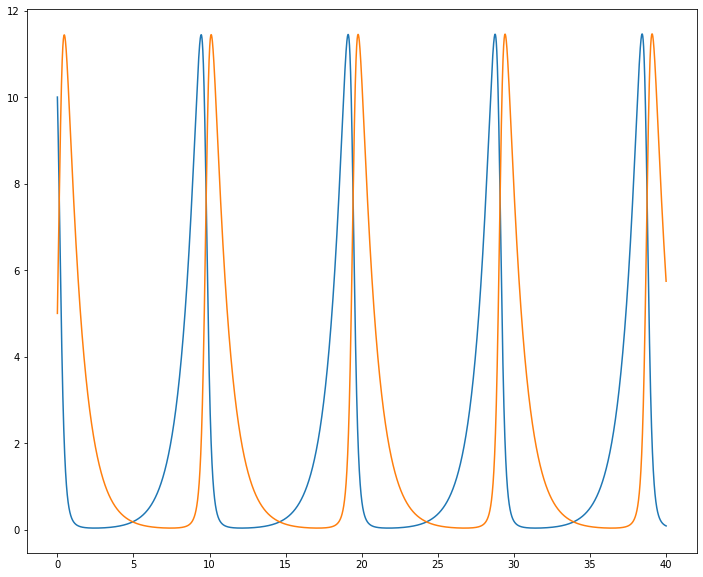

In [7]:
%%time
a1 = 1
a2 = .1
l1 = .5
l2 = .5
def volterra_model(N1, N2):
    deltaN = np.array([a1*N1 - l1*N1*N2, -a1*N2 + l2*N1*N2])
    return deltaN
T = 40
dt = 0.0001
time = np.linspace(0,T, int(T/dt))
N1o = 10
N2o = 5
N1 = np.array([N1o])
N2 = np.array([N2o])
for i, t in enumerate(time[1:]):
    deltaN = volterra_model(N1[i], N2[i])
    N1 = np.append(N1, N1[i] + deltaN[0]*dt)
    N2 = np.append(N2, N2[i] + deltaN[1]*dt)
    
q1 = a2/l2
q2 = a1/l1
f1 = N1/q1
f2 = N2/q2
u1 = (f1*np.exp(-f1))**(1/a1)
u2 = (f2*np.exp(-f2))**(1/a2)
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax.plot(time, N1)
ax.plot(time, N2)

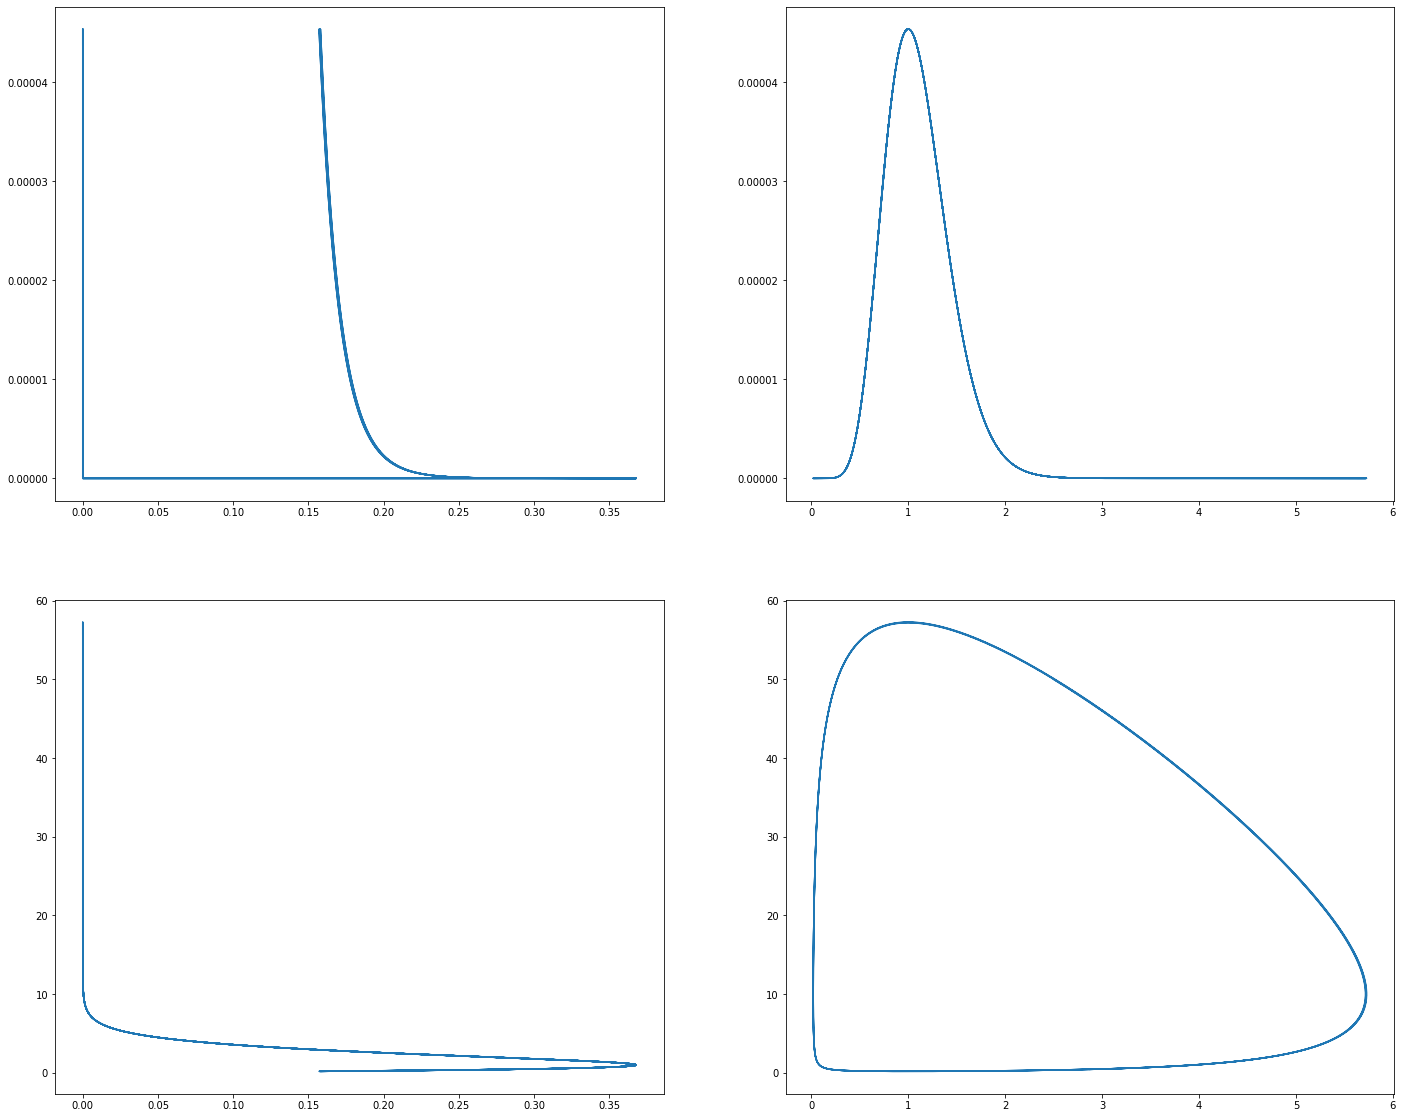

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (24,20))

ax[0,0].plot(u1, u2)
ax[0,1].plot(f2, u2)
ax[1,0].plot(u1, f1)
ax[1,1].plot(f2, f1)